In [1]:
# This cell prints a simple greeting to verify notebook execution
print("hello")

hello


In [2]:
# Import required classes and types for building the workflow graph
from langgraph.graph import StateGraph,START,END
from typing import TypedDict, NotRequired

In [3]:
# Define the state structure for the BMI workflow
class BMI_State(TypedDict):
    height_m: float  # Height in meters
    weight_kg: float  # Weight in kilograms
    BMI: float       # Calculated BMI value
    category: str    # BMI category label

In [4]:
# Node function to calculate BMI from height and weight
def calculate_BMI(state: BMI_State):
    height = state["height_m"]
    weight = state["weight_kg"]
    BMI = weight / height ** 2
    state["BMI"] = round(BMI, 2)
    return state

In [5]:
# Node function to label the BMI category based on the calculated BMI value
def label_BMI(state: BMI_State):
    BMI = state["BMI"]
    if BMI < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= BMI < 25:
        state["category"] = "Normal"
    elif 25 <= BMI < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"
    return state

In [6]:
# Define and build the workflow graph for BMI calculation and labeling
graph = StateGraph(BMI_State)

# Add nodes to the graph
graph.add_node("calculate_BMI", calculate_BMI)
graph.add_node("label_BMI", label_BMI)

# Add edges to define the sequence of execution
graph.add_edge(START, "calculate_BMI")
graph.add_edge("calculate_BMI", "label_BMI")
graph.add_edge("label_BMI", END)

# Compile the graph into a workflow object
workflow = graph.compile()

In [7]:
# Run the workflow with sample input and print the resulting state
initial_state: BMI_State = {
    "height_m": 1.8,
    "weight_kg": 80.0,
    "BMI": 0.0,         # Default placeholder
    "category": ""      # Default placeholder
}

# 2. Invoke the compiled workflow
# The workflow processes the initial state through the defined nodes and edges
result = workflow.invoke(initial_state)

# 3. Print the final result
print("Final BMI State:")
print(result)

Final BMI State:
{'height_m': 1.8, 'weight_kg': 80.0, 'BMI': 24.69, 'category': 'Normal'}


In [8]:
# Run the workflow with another input example (no print, just execution)
new_state = {"height_m": 1.73, "weight_kg": 70}
workflow.invoke(new_state)

{'height_m': 1.73, 'weight_kg': 70, 'BMI': 23.39, 'category': 'Normal'}

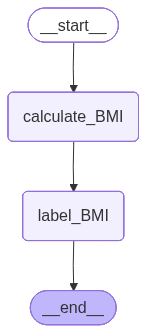

In [9]:
# Visualize the workflow graph using Mermaid diagram rendering
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())